# Penerapan Data Mining untuk Menentukan Kombinasi Paket Menu di Kedai Kopi Tovi Kohi Menggunakan CRISP DM

* 10119001 - IF1 - Arsy Opraza Akma, 10119044 - IF2 - Yohana Sri Rejeki, 10119221 - IF6 - Maulana Adil, 10119244 - IF6 - Mya Hauliyah
* Program Studi Teknik Informatika, Universitas Komputer Indonesia, Jl. Dipatiukur no 112-116, Lebakgede, Kecamatan Coblong, Kota Bandung, Jawa Barat 40132, Indonesia


**Abstrak**. Data transaksi penjualan akan terus bertambah dengan adanya kegiatan transaksi penjualan setiap harinya. Data tersebut dapat bermanfaat jika diolah menjadi informasi atau pengetahuan sebagai pendukung keputusan bisnis. Permasalahan yang terjadi di Kedai Kopi Tovi Kohi yaitu kombinasi pada paket menu yang tidak cocok untuk konsumen. Data transaksi penjualan di Kedai Kopi Tovi Kohi hanya menjadi arsip yang tidak dimanfaatkan. Untuk memecahkan permasalahan yang ada, yaitu dengan menerapkan data mining untuk mencari kombinasi yang tepat dalam paket menu berdasarkan data transaksi penjualan. Metode yang digunakan pada penelitian ini yaitu Association Rules dengan Algoritma Apriori. Association Rules merupakan teknik yang ada di data mining untuk mencari hubungan antar item dalam sekumpulan data yang telah ditentukan. Tujuannya yaitu mencari kemungkinan kombinasi yang sering muncul dari kumpulan item. Pada penelitian ini, Association Rules berfungsi untuk menganalisis seberapa sering suatu menu dibeli secara bersamaan dari data transaksi penjualan. Penerapan Algoritma Apriori dalam penelitian ini berhasil mencari kombinasi menu terbanyak berdasarkan data transaksi penjualan dan membentuk pola asosiasi berdasarkan kombinasi menu tersebut. Hasil dari penelitian ini yakni mengetahui kombinasi menu yang sering dibeli secara bersamaan sehingga dapat menjadi informasi strategis untuk menentukan paket menu yang tepat.


# Import Library yang dibutuhkan

In [629]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
import networkx as nx
import scipy
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Pembacaan Dataset

In [630]:
df = pd.read_csv('riwayat-transaksi2020-2021.csv')
df.head()

,No Faktur,Tanggal,Nama Outlet,Nama Kasir,Jam,Deskripsi Produk,Modifier,Jumlah Barang,Jumlah dibatalkan,Harga Per Barang,Jumlah Harga,Diskon Per Barang,Tipe Diskon per Barang,Diskon Transaksi,Tipe Diskon Transaksi,Pajak,Subtotal,Status,Metode Pembayaran,No. Referensi
0,276106LQ,25-06-2021,Tovi Kohi,Henggar Vyasto,10:21:35,"Fresh Milk Cimory 950ml,",NaN,2,0,174000,348000,48000,"Rp ,",0,NaN,0,300000,Transaksi,TRANSFER,NaN
1,276106LQ,25-06-2021,Tovi Kohi,Henggar Vyasto,10:21:35,"Espresso Based 1kg, House Blend Arabica",NaN,2,0,210000,420000,20000,"Rp ,",0,NaN,0,400000,Transaksi,TRANSFER,NaN
2,276106LQ,25-06-2021,Tovi Kohi,Henggar Vyasto,10:21:35,"Single Origin 200gr, Mekarwangi",NaN,1,0,90000,90000,45000,"% ,",0,NaN,0,45000,Transaksi,TRANSFER,NaN
3,245186PT,25-05-2021,Tovi Kohi,Henggar Vyasto,18:17:55,M Henggarvyasto 5 April - 5 mei,NaN,1,1,1668000,0,0,NaN,0,NaN,0,0,Dibatalkan,CASH,NaN
4,24509R23,25-05-2021,Tovi Kohi,Henggar Vyasto,09:09:25,"Espresso Based 1kg, House Blend 70:30",NaN,2,0,185000,370000,30000,"Rp ,",0,NaN,0,340000,Transaksi,TRANSFER,NaN


Mengecek banyaknya baris dan kolom yang terdapat pada dataset

In [631]:
df.shape

(5434, 20)

Mengecek Tipe Data

In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No Faktur               5434 non-null   object 
 1   Tanggal                 5434 non-null   object 
 2   Nama Outlet             5434 non-null   object 
 3   Nama Kasir              5434 non-null   object 
 4   Jam                     5434 non-null   object 
 5   Deskripsi Produk        5434 non-null   object 
 6   Modifier                0 non-null      float64
 7   Jumlah Barang           5434 non-null   int64  
 8   Jumlah dibatalkan       5434 non-null   int64  
 9   Harga Per Barang        5434 non-null   int64  
 10  Jumlah Harga            5434 non-null   int64  
 11  Diskon Per Barang       5434 non-null   int64  
 12  Tipe Diskon per Barang  61 non-null     object 
 13  Diskon Transaksi        5434 non-null   int64  
 14  Tipe Diskon Transaksi   738 non-null    

Mengecek Nilai Null

In [633]:
df.isnull().sum()

No Faktur                    0
Tanggal                      0
Nama Outlet                  0
Nama Kasir                   0
Jam                          0
Deskripsi Produk             0
Modifier                  5434
Jumlah Barang                0
Jumlah dibatalkan            0
Harga Per Barang             0
Jumlah Harga                 0
Diskon Per Barang            0
Tipe Diskon per Barang    5373
Diskon Transaksi             0
Tipe Diskon Transaksi     4696
Pajak                        0
Subtotal                     0
Status                       0
Metode Pembayaran            0
No. Referensi             5434
dtype: int64

Analisis Deskriptif

In [634]:
df.describe()

,Modifier,Jumlah Barang,Jumlah dibatalkan,Harga Per Barang,Jumlah Harga,Diskon Per Barang,Diskon Transaksi,Pajak,Subtotal,No. Referensi
count,0.0,5434.000000,5434.000000,5.434000e+03,5434.000000,5434.000000,5434.000000,5434.0,5434.000000,0.0
mean,NaN,1.180346,0.034965,1.722540e+04,17785.057232,95.491351,345.945160,0.0,17343.620721,NaN
std,NaN,0.640848,0.253580,5.434303e+04,16300.650076,1471.434835,1391.889897,0.0,15250.833490,NaN
min,NaN,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,1.000000,0.000000,1.400000e+04,14000.000000,0.000000,0.000000,0.0,13000.000000,NaN
50%,NaN,1.000000,0.000000,1.600000e+04,16000.000000,0.000000,0.000000,0.0,16000.000000,NaN
75%,NaN,1.000000,0.000000,1.800000e+04,18000.000000,0.000000,0.000000,0.0,18000.000000,NaN
max,NaN,12.000000,12.000000,3.350000e+06,522000.000000,48000.000000,45000.000000,0.0,486000.000000,NaN


Mengecek Transaksi yang dibatalkan

In [635]:
df['Status'].value_counts().sort_values(ascending=False).head(10)

Transaksi         5258
Dibatalkan         149
Batal Sebagian      27
Name: Status, dtype: int64

Menghilangkan Status Transaksi Dibatalkan

In [636]:
df1 = df[~(df["Status"] == "Transaksi")].index 
df.drop(df1, inplace = True)
df

,No Faktur,Tanggal,Nama Outlet,Nama Kasir,Jam,Deskripsi Produk,Modifier,Jumlah Barang,Jumlah dibatalkan,Harga Per Barang,Jumlah Harga,Diskon Per Barang,Tipe Diskon per Barang,Diskon Transaksi,Tipe Diskon Transaksi,Pajak,Subtotal,Status,Metode Pembayaran,No. Referensi
0,276106LQ,25-06-2021,Tovi Kohi,Henggar Vyasto,10:21:35,"Fresh Milk Cimory 950ml,",NaN,2,0,174000,348000,48000,"Rp ,",0,NaN,0,300000,Transaksi,TRANSFER,NaN
1,276106LQ,25-06-2021,Tovi Kohi,Henggar Vyasto,10:21:35,"Espresso Based 1kg, House Blend Arabica",NaN,2,0,210000,420000,20000,"Rp ,",0,NaN,0,400000,Transaksi,TRANSFER,NaN
2,276106LQ,25-06-2021,Tovi Kohi,Henggar Vyasto,10:21:35,"Single Origin 200gr, Mekarwangi",NaN,1,0,90000,90000,45000,"% ,",0,NaN,0,45000,Transaksi,TRANSFER,NaN
4,24509R23,25-05-2021,Tovi Kohi,Henggar Vyasto,09:09:25,"Espresso Based 1kg, House Blend 70:30",NaN,2,0,185000,370000,30000,"Rp ,",0,NaN,0,340000,Transaksi,TRANSFER,NaN
5,24509R23,25-05-2021,Tovi Kohi,Henggar Vyasto,09:09:25,"Single Origin 200gr, Mekarwangi",NaN,1,0,90000,90000,5000,"Rp ,",0,NaN,0,85000,Transaksi,TRANSFER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,021132G2,21-01-2020,Tovi Kohi,Henggar Vyasto,13:25:54,"Gula Aren, Original",NaN,4,0,16000,64000,0,NaN,0,NaN,0,64000,Transaksi,CASH,NaN
5425,021132G2,21-01-2020,Tovi Kohi,Henggar Vyasto,13:25:54,"Shake Presso, Original",NaN,2,0,15000,30000,0,NaN,0,NaN,0,30000,Transaksi,CASH,NaN
5426,021132G2,21-01-2020,Tovi Kohi,Henggar Vyasto,13:25:54,"Cafe Latte, Original",NaN,1,0,16000,16000,0,NaN,0,NaN,0,16000,Transaksi,CASH,NaN
5427,021132G2,21-01-2020,Tovi Kohi,Henggar Vyasto,13:25:54,"Doppio,",NaN,1,0,10000,10000,0,NaN,0,NaN,0,10000,Transaksi,CASH,NaN


In [637]:
df['Status'].value_counts().sort_values(ascending=False).head(10)

Transaksi    5258
Name: Status, dtype: int64

Menghilangkan abtribut yang tidak perlu

In [638]:
df.drop(['No Faktur','Nama Outlet','Modifier', 'Tipe Diskon per Barang','Tipe Diskon Transaksi','No. Referensi','Nama Kasir','Jumlah dibatalkan','Harga Per Barang','Jumlah Harga','Diskon Per Barang','Diskon Transaksi','Pajak','Subtotal','Status','Metode Pembayaran'],axis=1, inplace=True)

Export ke Dataset baru

In [639]:
df.to_csv('dataset_baru.csv')

# Dataset Baru

Pembacaan dataset baru

In [640]:
df2 = pd.read_csv('dataset_baru.csv')
df2.head()

,Unnamed: 0,Tanggal,Jam,Deskripsi Produk,Jumlah Barang
0,0,25-06-2021,10:21:35,"Fresh Milk Cimory 950ml,",2
1,1,25-06-2021,10:21:35,"Espresso Based 1kg, House Blend Arabica",2
2,2,25-06-2021,10:21:35,"Single Origin 200gr, Mekarwangi",1
3,4,25-05-2021,09:09:25,"Espresso Based 1kg, House Blend 70:30",2
4,5,25-05-2021,09:09:25,"Single Origin 200gr, Mekarwangi",1


Membaca banyaknya baris dan kolom

In [641]:
df2.shape

(5258, 5)

Menghilangkan kolom yang tidak perlu

In [642]:
df2

,Unnamed: 0,Tanggal,Jam,Deskripsi Produk,Jumlah Barang
0,0,25-06-2021,10:21:35,"Fresh Milk Cimory 950ml,",2
1,1,25-06-2021,10:21:35,"Espresso Based 1kg, House Blend Arabica",2
2,2,25-06-2021,10:21:35,"Single Origin 200gr, Mekarwangi",1
3,4,25-05-2021,09:09:25,"Espresso Based 1kg, House Blend 70:30",2
4,5,25-05-2021,09:09:25,"Single Origin 200gr, Mekarwangi",1
...,...,...,...,...,...
5253,5424,21-01-2020,13:25:54,"Gula Aren, Original",4
5254,5425,21-01-2020,13:25:54,"Shake Presso, Original",2
5255,5426,21-01-2020,13:25:54,"Cafe Latte, Original",1
5256,5427,21-01-2020,13:25:54,"Doppio,",1


In [643]:
df2.drop(['Unnamed: 0'],axis=1, inplace=True)

Analisis Deskriptif Dataset Baru

In [644]:
df2.describe()

,Jumlah Barang
count,5258.000000
mean,1.179916
std,0.628987
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11.000000


In [645]:
# new_data = [item.removesuffix(',') for item in df['Deskripsi Produk']]

In [646]:
df2['Deskripsi Produk'].nunique()

231

Banyaknya data di deksripsi produk

In [647]:
df2['Deskripsi Produk'].value_counts().sort_values(ascending=False)

Gula Aren, Original                      500
Cafe Latte, Original                     261
Pink Story, Ice                          191
Lemon Tea, Ice                           191
Coffee Beer,                             182
                                        ... 
absensi,                                   1
Espresso Based 1kg, House Blend 70:30      1
Cold Drip, Black                           1
Cake, Cake Only                            1
Tea, Hot                                   1
Name: Deskripsi Produk, Length: 231, dtype: int64

# Menentukan Best Sellers / Penjualan Terbaik pada produk yang ada

Text(0.5, 1.0, 'Best sellers')

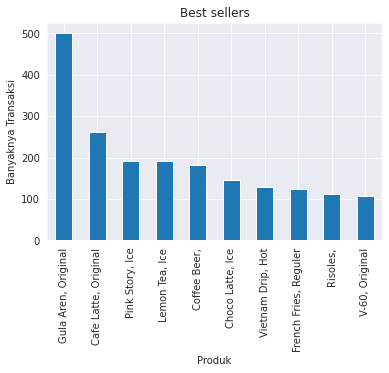

In [648]:
fig, ax=plt.subplots(figsize=(6,4))
df['Deskripsi Produk'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Banyaknya Transaksi')
plt.xlabel('Produk')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Best sellers')

# Menentukan Jam Sibuk Di mana Banyak Pelanggan yang Datang Berkunjung Untuk Membeli

In [649]:
df2.loc[(df2['Jam']<'12:00:00'),'Waktu']='Pagi'
df2.loc[(df2['Jam']>='12:00:00')&(df2['Jam']<'17:00:00'),'Waktu']='Siang'
df2.loc[(df2['Jam']>='17:00:00')&(df2['Jam']<'21:00:00'),'Waktu']='Sore'
df2.loc[(df2['Jam']>='21:00:00')&(df2['Jam']<'23:59:00'),'Waktu']='Malem'

Text(0.5, 1.0, 'Jam Sibuk')

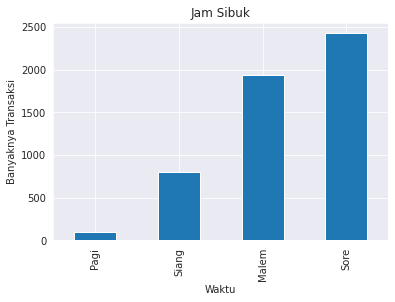

In [650]:
fig, ax=plt.subplots(figsize=(6,4))
sns.set_style('darkgrid')
df2.groupby('Waktu')['Deskripsi Produk'].count().sort_values().plot(kind='bar')
plt.ylabel('Banyaknya Transaksi')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Jam Sibuk')

In [651]:
df2.groupby('Waktu')['Deskripsi Produk'].count().sort_values(ascending=False)

Waktu
Sore     2425
Malem    1940
Siang     798
Pagi       95
Name: Deskripsi Produk, dtype: int64

# Menentukan Jam Sibuk Berdasarkan Bulan dan Tahun

In [652]:
df2['Date_Time']=pd.to_datetime(df2['Tanggal']+' '+df2['Jam'])
df2['Hari']=df2['Date_Time'].dt.day_name()
df2['Bulan']=df2['Date_Time'].dt.month
df2['Nama_Bulan']=df2['Date_Time'].dt.month_name()
df2['Tahun']=df2['Date_Time'].dt.year
df2['Bulan_Tahun']=df2['Tahun'].apply(str)+' '+df2['Nama_Bulan'].apply(str)
df2.drop(['Tanggal','Jam'], axis=1, inplace=True)

df2.index=df2['Date_Time']
df2.index.name='Tanggal'
df2.drop(['Date_Time'],axis=1,inplace=True)
df2.head()

,Deskripsi Produk,Jumlah Barang,Waktu,Hari,Bulan,Nama_Bulan,Tahun,Bulan_Tahun
Tanggal,,,,,,,,
2021-06-25 10:21:35,"Fresh Milk Cimory 950ml,",2,Pagi,Friday,6,June,2021,2021 June
2021-06-25 10:21:35,"Espresso Based 1kg, House Blend Arabica",2,Pagi,Friday,6,June,2021,2021 June
2021-06-25 10:21:35,"Single Origin 200gr, Mekarwangi",1,Pagi,Friday,6,June,2021,2021 June
2021-05-25 09:09:25,"Espresso Based 1kg, House Blend 70:30",2,Pagi,Tuesday,5,May,2021,2021 May
2021-05-25 09:09:25,"Single Origin 200gr, Mekarwangi",1,Pagi,Tuesday,5,May,2021,2021 May


Text(0.5, 1.0, 'Jam Sibuk (Berdasarkan Bulan dan Tahun)')

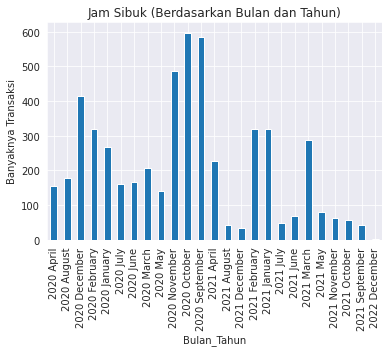

In [653]:
df2.groupby('Bulan_Tahun')['Deskripsi Produk'].count().plot(kind='bar')
plt.ylabel('Banyaknya Transaksi')
plt.title('Jam Sibuk (Berdasarkan Bulan dan Tahun)')

In [654]:
df2.loc[df2['Bulan_Tahun']=='2020 October'].nunique()

Deskripsi Produk    106
Jumlah Barang         5
Waktu                 4
Hari                  7
Bulan                 1
Nama_Bulan            1
Tahun                 1
Bulan_Tahun           1
dtype: int64

In [655]:
df3=df2.pivot_table(index='Nama_Bulan',columns='Deskripsi Produk', aggfunc={'Deskripsi Produk':'count'}).fillna(0)
df3['Max']=df3.idxmax(axis=1)
df3.head()

Deskripsi Produk                                \
Deskripsi Produk     Air mineral, Americano, Hot Americano, Ice   
Nama_Bulan                                                        
April                         0.0            4.0            3.0   
August                        1.0            3.0            3.0   
December                      4.0            6.0            4.0   
February                      0.0            7.0           14.0   
January                       1.0            4.0           12.0   

                                                                            \
Deskripsi Produk Black Coldbrew, Bon - Bon, Bottled Coffee, Black Coldbrew   
Nama_Bulan                                                                   
April                        0.0        1.0                            1.0   
August                       0.0        1.0                            0.0   
December                     0.0        0.0                            0.0   
February                     1.0        2.0                            0.0   
January                      2.0        0.0                            0.0   

                                                   \
Deskripsi Produk Bottled Coffee, Iced Latte 250ml   
Nama_Bulan                                          
April                                         1.0   
August                                        0.0   
December                                      0.0   
February                                      0.0   
January                                       0.0   

                                                 \
Deskripsi Produk Bottled Coffee, White Coldbrew   
Nama_Bulan                                        
April                                       1.0   
August                                      0.0   
December                                    0.0   
February                                    0.0   
January                                     0.0   

                                                      \
Deskripsi Produk Bowl Ayam Sauce Asam Manis, Reguler   
Nama_Bulan                                             
April                                            0.0   
August                                           0.0   
December                                         0.0   
February                                         0.0   
January                                          0.0   

                                               ...                             \
Deskripsi Produk Bowl Ayam Sauce Bbq, Reguler  ... special tea strawberry 1kg   
Nama_Bulan                                     ...                              
April                                     0.0  ...         0.0            0.0   
August                                    0.0  ...         0.0            0.0   
December                                  0.0  ...         0.0            0.0   
February                                  0.0  ...         1.0            0.0   
January                                   0.0  ...         0.0            1.0   

                                                                               \
Deskripsi Produk strawberry jam susu fm  teh telur thai tea v-60 vietnam drip   
Nama_Bulan                                                                      
April                       0.0     0.0  0.0   0.0      0.0  1.0          0.0   
August                      0.0     0.0  0.0   0.0      0.0  0.0          0.0   
December                    0.0     1.0  0.0   1.0      1.0  0.0          0.0   
February                    0.0     0.0  0.0   0.0      0.0  0.0          0.0   
January                     0.0     0.0  0.0   0.0      0.0  0.0          0.0   

                                                      Max  
Deskripsi Produk                                           
Nama_Bulan                                                 
April             (Deskripsi Produk, Gula Aren, Original)  
August            (Deskripsi Produ

In [656]:
df4=df2.pivot_table(index='Waktu',columns='Deskripsi Produk', aggfunc={'Deskripsi Produk':'count'}).fillna(0)
df4['Max']=df4.idxmax(axis=1)
df4

Deskripsi Produk                                \
Deskripsi Produk     Air mineral, Americano, Hot Americano, Ice   
Waktu                                                             
Malem                        18.0           39.0           17.0   
Pagi                          0.0            4.0            1.0   
Siang                         5.0            8.0           17.0   
Sore                         10.0           40.0           35.0   

                                                                            \
Deskripsi Produk Black Coldbrew, Bon - Bon, Bottled Coffee, Black Coldbrew   
Waktu                                                                        
Malem                        1.0        0.0                            1.0   
Pagi                         0.0        0.0                            0.0   
Siang                        2.0        4.0                            0.0   
Sore                         1.0        6.0                            0.0   

                                                   \
Deskripsi Produk Bottled Coffee, Iced Latte 250ml   
Waktu                                               
Malem                                         1.0   
Pagi                                          0.0   
Siang                                         0.0   
Sore                                          0.0   

                                                 \
Deskripsi Produk Bottled Coffee, White Coldbrew   
Waktu                                             
Malem                                       1.0   
Pagi                                        0.0   
Siang                                       0.0   
Sore                                        0.0   

                                                      \
Deskripsi Produk Bowl Ayam Sauce Asam Manis, Reguler   
Waktu                                                  
Malem                                            1.0   
Pagi                                             0.0   
Siang                                            0.0   
Sore                                             4.0   

                                               ...                             \
Deskripsi Produk Bowl Ayam Sauce Bbq, Reguler  ... special tea strawberry 1kg   
Waktu                                          ...                              
Malem                                     0.0  ...         0.0            0.0   
Pagi                                      0.0  ...         0.0            0.0   
Siang                                     0.0  ...         1.0            1.0   
Sore                                      1.0  ...         0.0            0.0   

                                                                               \
Deskripsi Produk strawberry jam susu fm  teh telur thai tea v-60 vietnam drip   
Waktu                                                                           
Malem                       1.0     1.0  2.0   0.0      3.0  0.0          0.0   
Pagi                        0.0     0.0  0.0   0.0      0.0  0.0          0.0   
Siang                       0.0     0.0  0.0   0.0      0.0  0.0          0.0   
Sore                        2.0     0.0  0.0   1.0      0.0  1.0          1.0   

                                                      Max  
Deskripsi Produk                                           
Waktu                                                      
Malem             (Deskripsi Produk, Gula Aren, Original)  
Pagi              (Deskripsi Produk, Gula Aren, Original)  
Siang             (Deskripsi Produk, Gula Aren, Original)  
Sore              (Deskripsi Produk, Gula Aren, Original)  

[4 rows x 232 columns]

In [657]:
df5=df2.pivot_table(index='Hari',columns='Deskripsi Produk', aggfunc={'Deskripsi Produk':'count'}).fillna(0)
df5['Max']=df5.idxmax(axis=1)
df5

Deskripsi Produk                                \
Deskripsi Produk     Air mineral, Americano, Hot Americano, Ice   
Hari                                                              
Friday                        5.0           10.0           10.0   
Monday                        3.0           15.0            6.0   
Saturday                      3.0           13.0           18.0   
Sunday                        2.0           10.0            9.0   
Thursday                      7.0            8.0            8.0   
Tuesday                       5.0           14.0            9.0   
Wednesday                     8.0           21.0           10.0   

                                                                            \
Deskripsi Produk Black Coldbrew, Bon - Bon, Bottled Coffee, Black Coldbrew   
Hari                                                                         
Friday                       0.0        2.0                            0.0   
Monday                       0.0        2.0                            0.0   
Saturday                     3.0        1.0                            0.0   
Sunday                       0.0        1.0                            0.0   
Thursday                     0.0        2.0                            0.0   
Tuesday                      0.0        1.0                            0.0   
Wednesday                    1.0        1.0                            1.0   

                                                   \
Deskripsi Produk Bottled Coffee, Iced Latte 250ml   
Hari                                                
Friday                                        0.0   
Monday                                        0.0   
Saturday                                      0.0   
Sunday                                        0.0   
Thursday                                      0.0   
Tuesday                                       0.0   
Wednesday                                     1.0   

                                                 \
Deskripsi Produk Bottled Coffee, White Coldbrew   
Hari                                              
Friday                                      0.0   
Monday                                      0.0   
Saturday                                    0.0   
Sunday                                      0.0   
Thursday                                    0.0   
Tuesday                                     0.0   
Wednesday                                   1.0   

                                                      \
Deskripsi Produk Bowl Ayam Sauce Asam Manis, Reguler   
Hari                                                   
Friday                                           0.0   
Monday                                           1.0   
Saturday                                         0.0   
Sunday                                           0.0   
Thursday                                         4.0   
Tuesday                                          0.0   
Wednesday                                        0.0   

                                               ...                             \
Deskripsi Produk Bowl Ayam Sauce Bbq, Reguler  ... special tea strawberry 1kg   
Hari                                           ...                              
Friday                                    0.0  ...         0.0            0.0   
Monday                                    0.0  ...         0.0            1.0   
Saturday                                  0.0  ...         0.0            0.0   
Sunday                                    0.0  ...         0.0            0.0   
Thursday                                  1.0  ...         0.0            0.0   
Tuesday                                   0.0  ...         0.0            0.0   
Wednesday                                 0.0  ...         1.0            0.0   

                                                                               \
Deskripsi Produk strawberry jam susu fm  teh telur thai tea v-60 vietn

# Menentukan Waktu Sibuk Berdasarkan Bulan dan Tahun

Text(0.5, 1.0, 'Waktu Sibuk (Berdasarkan Bulan dan Tahun)')

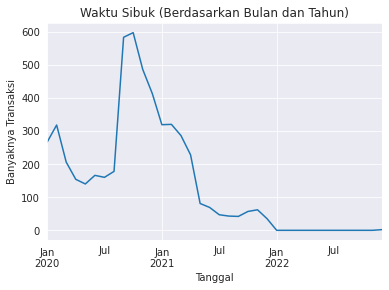

In [658]:
df2['Deskripsi Produk'].resample('M').count().plot()
plt.ylabel('Banyaknya Transaksi')
plt.title('Waktu Sibuk (Berdasarkan Bulan dan Tahun)')

# Menentukan Minggu Sibuk Berdasarkan Bulan dan Tahun

Text(0.5, 1.0, 'Minggu Sibuk (Berdasarkan Bulan dan Tahun)')

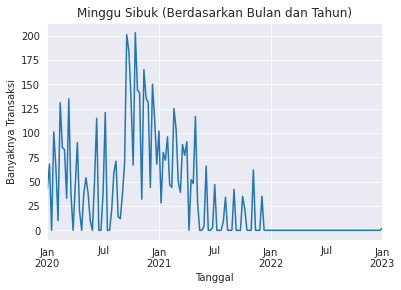

In [659]:
df2['Deskripsi Produk'].resample('W').count().plot()
plt.ylabel('Banyaknya Transaksi')
plt.title('Minggu Sibuk (Berdasarkan Bulan dan Tahun)')

# Menentukan Hari Sibuk Berdasarkan Bulan dan Tahun

Text(0.5, 1.0, 'Hari Sibuk (Berdasarkan Bulan dan Tahun)')

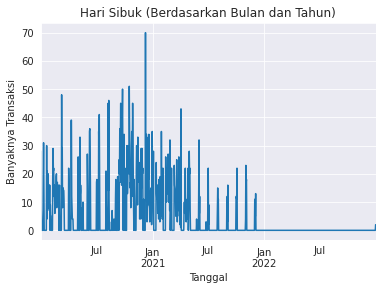

In [660]:
df2['Deskripsi Produk'].resample('D').count().plot()
plt.ylabel('Banyaknya Transaksi')
plt.title('Hari Sibuk (Berdasarkan Bulan dan Tahun)')

In [661]:
df2['Deskripsi Produk'].resample('D').count().min()

0

In [662]:
df2['Deskripsi Produk'].resample('D').count().max()

70

# Penerapan Association Rule

In [663]:
lst=[]
for item in df2['Jumlah Barang'].unique():
    lst2=list(set(df2[df2['Jumlah Barang']==item]['Deskripsi Produk']))
    if len(lst2)>0:
        lst.append(lst2)
print(lst[0:3])
print(len(lst))

[['Cinnamon Coffee,', 'Hazelnut,', 'Extra Shoot,', 'Japanese Pudding, Pudding Only', 'Dragon Tea, Hot', 'Coffee Beer,', 'Risoles,', 'Long Black,', 'Indomie Rebus, Reguler', 'Pink Story, Ice', 'Choco Latte, Hot', 'Lemon Tea, Ice', 'Mochacino, Ice', 'Salted Caramel,', 'Milk Tea, Ice', 'Garlic Bread,', 'Air mineral,', 'Rum,', 'Matcha Latte, Hot', 'Espresso Based 1kg, House Blend 70:30', 'Tea, Ice Tea', 'Strawberry Jam,', 'Bundling, Iced Latte + Cireng', 'Brownies Baymax,', 'Cireng , Reguler', 'Gula Aren, Original', 'Chocho Velvet,', 'Vietnam Drip, Hot', 'Piccolo, Ice', 'Soft Cookies, + Drink', 'French Fries, Reguler', 'Shake Presso, Lemon', 'Americano, Hot', 'Croissant,', 'Iced Latte, Flavour', 'V-60, Japstyle', 'Cafe Latte, Flavour', 'Matcha Latte, Ice', 'Dragon Tea, Ice', 'Shake Presso, Original', 'White Story,', 'Choco Hazelnut, Ice', 'Vanilla Milk, Hot', 'Bowl Ayam Teriyaki,', 'Indomie Goreng, Telur', 'Indomie Goreng, Reguler', 'Espresso Based 1kg, House Blend Arabica', 'Cake, + Drink

In [664]:
df2['Deskripsi Produk'].replace(',','')
df2

,Deskripsi Produk,Jumlah Barang,Waktu,Hari,Bulan,Nama_Bulan,Tahun,Bulan_Tahun
Tanggal,,,,,,,,
2021-06-25 10:21:35,"Fresh Milk Cimory 950ml,",2,Pagi,Friday,6,June,2021,2021 June
2021-06-25 10:21:35,"Espresso Based 1kg, House Blend Arabica",2,Pagi,Friday,6,June,2021,2021 June
2021-06-25 10:21:35,"Single Origin 200gr, Mekarwangi",1,Pagi,Friday,6,June,2021,2021 June
2021-05-25 09:09:25,"Espresso Based 1kg, House Blend 70:30",2,Pagi,Tuesday,5,May,2021,2021 May
2021-05-25 09:09:25,"Single Origin 200gr, Mekarwangi",1,Pagi,Tuesday,5,May,2021,2021 May
...,...,...,...,...,...,...,...,...
2020-01-21 13:25:54,"Gula Aren, Original",4,Siang,Tuesday,1,January,2020,2020 January
2020-01-21 13:25:54,"Shake Presso, Original",2,Siang,Tuesday,1,January,2020,2020 January
2020-01-21 13:25:54,"Cafe Latte, Original",1,Siang,Tuesday,1,January,2020,2020 January


In [665]:
lst

[['Cinnamon Coffee,',
  'Hazelnut,',
  'Extra Shoot,',
  'Japanese Pudding, Pudding Only',
  'Dragon Tea, Hot',
  'Coffee Beer,',
  'Risoles,',
  'Long Black,',
  'Indomie Rebus, Reguler',
  'Pink Story, Ice',
  'Choco Latte, Hot',
  'Lemon Tea, Ice',
  'Mochacino, Ice',
  'Salted Caramel,',
  'Milk Tea, Ice',
  'Garlic Bread,',
  'Air mineral,',
  'Rum,',
  'Matcha Latte, Hot',
  'Espresso Based 1kg, House Blend 70:30',
  'Tea, Ice Tea',
  'Strawberry Jam,',
  'Bundling, Iced Latte + Cireng',
  'Brownies Baymax,',
  'Cireng , Reguler',
  'Gula Aren, Original',
  'Chocho Velvet,',
  'Vietnam Drip, Hot',
  'Piccolo, Ice',
  'Soft Cookies, + Drink',
  'French Fries, Reguler',
  'Shake Presso, Lemon',
  'Americano, Hot',
  'Croissant,',
  'Iced Latte, Flavour',
  'V-60, Japstyle',
  'Cafe Latte, Flavour',
  'Matcha Latte, Ice',
  'Dragon Tea, Ice',
  'Shake Presso, Original',
  'White Story,',
  'Choco Hazelnut, Ice',
  'Vanilla Milk, Hot',
  'Bowl Ayam Teriyaki,',
  'Indomie Goreng, Telu

In [666]:
te = TransactionEncoder()
te_data = te.fit(lst).transform(lst)
df2 = pd.DataFrame(te_data,columns=te.columns_)
df2.head()

,"Air mineral,","Americano, Hot","Americano, Ice","Black Coldbrew,","Bon - Bon,","Bottled Coffee, Black Coldbrew","Bottled Coffee, Iced Latte 250ml","Bottled Coffee, White Coldbrew","Bowl Ayam Sauce Asam Manis, Reguler","Bowl Ayam Sauce Bbq, Reguler",...,shake,special tea,strawberry 1kg,strawberry jam,susu fm,teh,telur,thai tea,v-60,vietnam drip
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Menggunakan algoritma Apriori dengan minimum support yang telah ditentukan

In [667]:
freq_items = apriori(df2, min_support = 0.4, use_colnames = True) 
freq_items

,support,itemsets
0,0.454545,"(Brownies Baymax,)"
1,0.818182,"(Croissant,)"
2,0.545455,"(Gula Aren, Original)"
3,0.454545,"(Japanese Pudding, Pudding Only)"
4,0.454545,"(Croissant,, Brownies Baymax,)"
5,0.545455,"(Croissant,, Gula Aren, Original)"


Menentukan rules untuk antecendent support, consequent support, confidence, lift, dan support untuk melihat kombinasi yang memungkinkan

In [668]:
rules = association_rules(freq_items2, metric="confidence", min_threshold = 0.5)
rules = rules[(rules['antecedent support'] > 0.1)&
                        (rules2['consequent support'] >0.3) &
                        (rules2['confidence'] > 0.3) &
                        (rules2['lift'] > 0.5)&
                        (rules2['support']>0.3)]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Croissant,)","(Brownies Baymax,)",0.818182,0.454545,0.454545,0.555556,1.222222,0.082645,1.227273
1,"(Brownies Baymax,)","(Croissant,)",0.454545,0.818182,0.454545,1.000000,1.222222,0.082645,inf
2,"(Croissant,)","(Gula Aren, Original)",0.818182,0.545455,0.545455,0.666667,1.222222,0.099174,1.363636
3,"(Gula Aren, Original)","(Croissant,)",0.545455,0.818182,0.545455,1.000000,1.222222,0.099174,inf
